# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Como analista de la empresa arriba mencionada, procederé a evaluar las variables que impactan en el precio de un vehículo. 

A continuación, se procederá a la carga de los datos para examinarlos, procesarlos y llegar a conclusiones.



## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode


### Cargar datos

Se procederá a cargar los datos del archivo entregado y posterior se solicitara la información general, para detallar las columnas y número de datos 

In [2]:
# Carga el archivo de datos en un DataFrame

data_anuncios = pd.read_csv("/datasets/vehicles_us.csv")


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [3]:
# imprime la información general/resumida sobre el DataFrame
data_anuncios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
data_anuncios.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Los datos fueron guardados en un dataframe de nombre datos_anuncios y se observa que hay en total 51525 filas con 13 columnas. 
- Las columnas "model_year", "cylinders", "odometer", "paint_color", "is_4wd" tienen datos ausentes y este número varía entre las columnas, por lo que no parece ser simétrica la data.
- La fecha de publicación del anuncio no viene en formato date, por lo que deberá de ser cambiado.
- Los datos de la columna "is_4wd" son del tipo booleano, donde 1 sera verdadero y 0 sera falso.
- Las columnas "model", "condition", "paint_color", "transmission", "fuel", "type" son categóricas y el resto cuantitativas.

In [5]:
#valores ausentes
data_anuncios.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusiones y siguientes pasos


1. La columna "is_4wd" es la que mayor cantidad de datos ausentes tiene, es probable que los usuarios no rellenaron este renglón porque su vehículo no tiene tracción 4 ruedas, por lo general, son pocos los vehículos que tienen esta característica. Observando la data se aprecia que los datos que hay son 1, es decir, esta variable es booleana y 1 significa que si tiene tracción 4 ruedas y 0 que no tendría, por lo que ese NaN realmente podría ser reemplazado por un 0.
2. La columna con "paint_color" es la segunda en cantidad de datos ausentes, esto podría deberse a que el vehículo tiene más de un color, o es degradado o no es el color original o simplemente el anunciador no lo coloca para que el interesado en comprar, no lo descarte porque no es el color que busca, muchas veces del ver el coche nace el amor sin detenerse a pensar en el color.
3. La columna "odometer" tiene 7892 valores ausentes y este dato si es importante al momento de una venta, no creo que tantos vehículos tengan dañado el sensor o solo lo dejan de publicar para que el cliente no lo descarte a priori por tanta rosca, osea tanto uso.
4. Los valores ausentes en cilindraje pueden deberse a desconocimiento del anunciante o simplemente no cree importante colocar el dato.
5. Finalmente el "model_year" es la variable con menos datos ausentes, por lo que se pensaría que no les interesa publicar que tan viejo pueda ser el coche, no creo que para coches nuevos o versiones recientes falte este dato. Hoy en día, las personas prefieren comprar vehículos de modelos recientes, al menos, claro está que sea un coleccionista de coches de vieja data.

A continuación se realizarán filtros y gráficos para encontrar, si existe, alguna relación entre los datos ausentes y poder darle tratamiento.


## Tratar los valores ausentes (si hay)

1.2.1 Ausentes en "is_4wd"

In [6]:
data_anuncios[data_anuncios["is_4wd"].isna()] 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [7]:
#calculo de porcentaje de ausentes en la columna "is_4wd"
def porcentaje_ausentes(data, columna):
    data_or_ausentes = data[columna].count()
    data_total_orig = data[columna].size
    porcentaje_ausentes = (data_total_orig - data_or_ausentes)/data_total_orig
    print(f"Porcentaje de datos ausentes en el campo {columna} en la data original:{porcentaje_ausentes:.0%}")

porcentaje_ausentes(data_anuncios,"is_4wd")

Porcentaje de datos ausentes en el campo is_4wd en la data original:50%


In [8]:
data_anuncios["is_4wd"].fillna(0, inplace=True)
data_anuncios["is_4wd"].isna().sum()

0

In [9]:
data_anuncios.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

1.2.2 Ausentes en "paint_color"

In [10]:
#calculo del porcentaje de ausentes en la columna "paint_color"
porcentaje_ausentes(data_anuncios,"paint_color")


Porcentaje de datos ausentes en el campo paint_color en la data original:18%


In [11]:
data_anuncios[(data_anuncios["paint_color"].isna()) & (data_anuncios["model_year"].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,0.0,2018-06-16,34
165,22000,NaN,ford f350 super duty,good,8.0,diesel,163000.0,automatic,truck,NaN,1.0,2019-02-05,38
397,14995,NaN,chevrolet camaro,excellent,8.0,gas,95000.0,automatic,coupe,NaN,0.0,2018-06-29,15
443,2025,NaN,chevrolet tahoe,good,8.0,gas,151000.0,automatic,SUV,NaN,1.0,2018-10-24,31
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,0.0,2018-08-09,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51312,1800,NaN,hyundai santa fe,good,6.0,gas,287000.0,automatic,SUV,NaN,0.0,2018-12-13,100
51339,19890,NaN,toyota tundra,excellent,8.0,gas,127405.0,automatic,truck,NaN,1.0,2019-02-02,69
51385,3495,NaN,jeep liberty,good,6.0,gas,129644.0,automatic,wagon,NaN,1.0,2018-08-22,28
51396,14995,NaN,ford f-150,good,8.0,gas,123676.0,automatic,truck,NaN,1.0,2018-07-12,13


In [12]:
data_anuncios["paint_color"].mode()

0    white
dtype: object

In [13]:
data_anuncios[(data_anuncios["paint_color"].isna()) & (data_anuncios["odometer"]>=60000)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,0.0,2018-06-04,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,7999,2010.0,chevrolet traverse,excellent,6.0,gas,109363.0,automatic,SUV,NaN,0.0,2018-12-15,25
51495,9500,2012.0,chevrolet traverse,good,6.0,gas,144500.0,automatic,SUV,NaN,1.0,2019-03-05,1
51496,4999,2002.0,toyota 4runner,excellent,6.0,gas,177901.0,automatic,SUV,NaN,1.0,2018-05-26,59
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175


In [14]:
data_anuncios["paint_color"].fillna("sin definir", inplace = True)
data_anuncios["paint_color"].isna().sum()

0

1.2.3 Ausentes en "odometer"

In [15]:
#porcentaje de ausentes en odometer
porcentaje_ausentes(data_anuncios,"odometer")

Porcentaje de datos ausentes en el campo odometer en la data original:15%


In [16]:
data_anuncios[(data_anuncios["odometer"].isna()) & (data_anuncios["model_year"].isna())] 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,sin definir,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,sin definir,0.0,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83


In [17]:
data_anuncios.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,0.315145,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,0.043384,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,0.405770,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,0.036267,0.003804
is_4wd,0.315145,0.043384,0.405770,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005703,0.005517,0.003804,0.002003,1.000000


<AxesSubplot:>

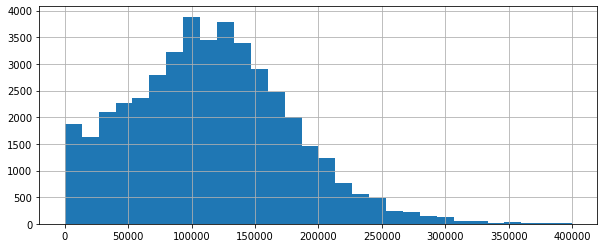

In [18]:
data_anuncios["odometer"].hist(bins=30, range=(0,400000), figsize=(10,4))

<AxesSubplot:>

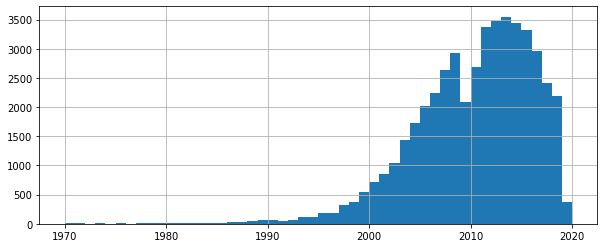

In [19]:
data_anuncios["model_year"].hist(bins=50, range=(1970,2020), figsize=(10,4))

<AxesSubplot:>

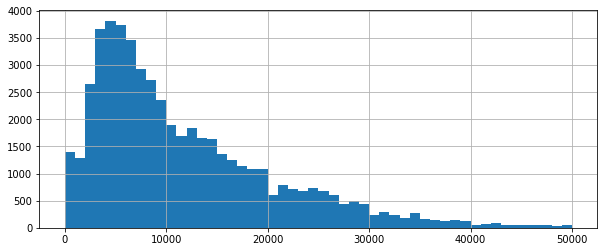

In [20]:
data_anuncios["price"].hist(bins=50, range=(0,50000), figsize=(10,4))

In [21]:
data_anuncios.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,51525.000000,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,0.496303,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.499991,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


<AxesSubplot:>

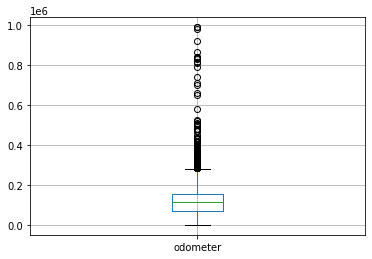

In [22]:
data_anuncios.boxplot("odometer")

<AxesSubplot:>

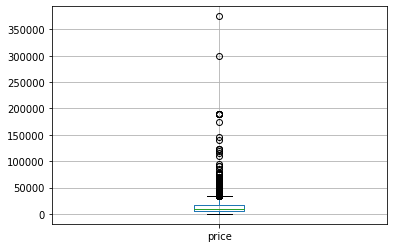

In [23]:
data_anuncios.boxplot("price")

<AxesSubplot:>

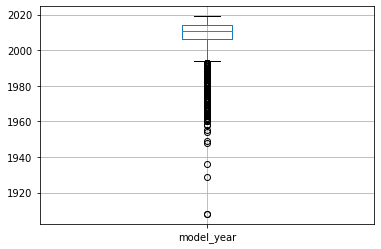

In [24]:
data_anuncios.boxplot("model_year")

In [25]:
data_anuncios[(data_anuncios["odometer"]>350000)] 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1023,5000,1996.0,toyota 4runner,good,6.0,gas,403000.0,automatic,SUV,black,1.0,2019-02-08,1
2104,10995,2007.0,ram 3500,good,NaN,diesel,359588.0,automatic,truck,white,0.0,2019-01-26,49
2264,2500,2001.0,toyota tundra,salvage,8.0,gas,482000.0,automatic,pickup,green,1.0,2019-02-08,22
2440,5300,2010.0,toyota corolla,excellent,4.0,gas,840000.0,automatic,sedan,silver,0.0,2019-02-04,13
2840,18500,2014.0,ford explorer,excellent,6.0,gas,866000.0,automatic,SUV,black,1.0,2018-07-20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48373,4995,2007.0,chevrolet silverado 1500,good,6.0,gas,469445.0,automatic,truck,white,0.0,2018-08-26,20
48760,5899,2006.0,chevrolet silverado,good,8.0,diesel,358000.0,automatic,truck,brown,1.0,2019-02-23,65
48962,40000,2014.0,ram 3500,excellent,NaN,diesel,980000.0,automatic,truck,white,1.0,2018-12-06,7
49206,11900,2004.0,ram 2500,good,6.0,diesel,470000.0,automatic,pickup,white,1.0,2018-10-16,34


In [26]:
data_anuncios[(data_anuncios["odometer"].isna()) & (data_anuncios["model_year"].isna())] 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,sin definir,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,sin definir,0.0,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83


In [27]:
data_anuncios.drop(data_anuncios[(data_anuncios["odometer"].isna()) & (data_anuncios["model_year"].isna())].index, inplace=True)

In [28]:
data_anuncios[data_anuncios["odometer"].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,sin definir,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,sin definir,0.0,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,sin definir,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,sin definir,0.0,2018-11-24,89


In [29]:
data_anuncios_odometro_median = data_anuncios.pivot_table(index="model_year", values="odometer", aggfunc="median")
data_anuncios_odometro_median

,odometer
model_year,
1908.0,169328.0
1936.0,30000.0
1948.0,4000.0
1949.0,1800.0
1954.0,3565.0
...,...
2015.0,78514.0
2016.0,54000.0
2017.0,41000.0


In [30]:
data_anuncios_odometro_promedio = data_anuncios.pivot_table(index="model_year", values="odometer", aggfunc="mean")
data_anuncios_odometro_promedio

,odometer
model_year,
1908.0,169328.000000
1936.0,30000.000000
1948.0,4000.000000
1949.0,1800.000000
1954.0,3565.000000
...,...
2015.0,82501.745817
2016.0,61455.480876
2017.0,47557.926471


In [31]:
data_anuncios_odometro_promedio / data_anuncios_odometro_median

,odometer
model_year,
1908.0,1.000000
1936.0,1.000000
1948.0,1.000000
1949.0,1.000000
1954.0,1.000000
...,...
2015.0,1.050790
2016.0,1.138064
2017.0,1.159949


In [32]:
#funcion para reemplazar los valores faltantes en "odometer" con la mediana
def reemplazo_odometro_median(millaje):
    model_year = millaje["model_year"]
    odometer = millaje["odometer"]
    if pd.isna(odometer):
        try:
            return data_anuncios_odometro_median["odometer"][model_year]
        except:
            return "error"
    return odometer


In [33]:
millaje_values=[2015.0, float("NaN")]
millaje_columns=["model_year", "odometer"]
millaje=pd.Series(data=millaje_values, index=millaje_columns)
reemplazo_odometro_median(millaje)

78514.0

In [34]:
data_anuncios.apply(reemplazo_odometro_median, axis=1).isna().sum()

0

In [35]:
data_anuncios["odometer"] = data_anuncios.apply(reemplazo_odometro_median, axis=1)

In [36]:
data_anuncios[data_anuncios["odometer"]=="error"]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,error,manual,other,silver,0.0,2018-11-18,59


In [37]:
data_anuncios.drop(data_anuncios[data_anuncios['odometer']=="error"].index, inplace=True)

In [38]:
data_anuncios.isna().sum()

price              0
model_year      3070
model              0
condition          0
cylinders       5201
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

1.2.4 Ausentes en "cylinders"

In [39]:
#porcentaje de ausentes en la columna de "cylinders"
porcentaje_ausentes(data_anuncios,"cylinders")

Porcentaje de datos ausentes en el campo cylinders en la data original:10%


<AxesSubplot:>

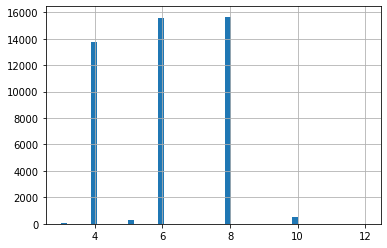

In [40]:
data_anuncios["cylinders"].hist(bins=50)

In [41]:
data_anuncios["cylinders"].describe()

count    45774.000000
mean         6.124372
std          1.660401
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [42]:
data_anuncios_cylinders_moda = data_anuncios.pivot_table(index="model", values="cylinders", aggfunc=mode)
data_anuncios_cylinders_moda

,cylinders
model,
acura tl,6.0
bmw x5,6.0
buick enclave,6.0
cadillac escalade,8.0
chevrolet camaro,6.0
...,...
toyota sienna,6.0
toyota tacoma,6.0
toyota tundra,8.0


In [43]:
#función para reemplazar valores ausentes en la columna de cilindraje
def reemplazo_cilindraje_median(cilindraje):
    model = cilindraje["model"]
    cylinders = cilindraje["cylinders"]
    if pd.isna(cylinders):
        try:
            return data_anuncios_cylinders_moda["cylinders"][model]
        except:
            return "error"
    return cylinders

In [44]:
cilindraje_values=["toyota tundra", float("NaN")]
cilindraje_columns=["model", "cylinders"]
cilindraje=pd.Series(data=cilindraje_values, index=cilindraje_columns)
reemplazo_cilindraje_median(cilindraje)

8.0

In [45]:
data_anuncios.apply(reemplazo_cilindraje_median, axis=1).isna().sum()

0

In [46]:
data_anuncios["cylinders"] = data_anuncios.apply(reemplazo_cilindraje_median, axis=1)

In [47]:
data_anuncios[data_anuncios["cylinders"]=="error"]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


1.2.5 Ausentes en "model_year"

In [48]:
#porcentaje de ausentes en la columna "model_year"
porcentaje_ausentes(data_anuncios,"model_year")

Porcentaje de datos ausentes en el campo model_year en la data original:6%


In [49]:
data_anuncios["model_year"].describe()

count    47905.000000
mean      2009.752155
std          6.271287
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Al igual que la columna cylinders, la media de esta columna es un decimal y en este caso no es posible encontrar un modelo de año con decimales, por lo que se tomará la mediana como aproximación.

In [50]:
data_anuncios_model_year_median = data_anuncios.pivot_table(index="model", values="model_year", aggfunc="median")
data_anuncios_model_year_median

,model_year
model,
acura tl,2007.0
bmw x5,2010.0
buick enclave,2012.0
cadillac escalade,2009.0
chevrolet camaro,2013.0
...,...
toyota sienna,2008.0
toyota tacoma,2010.0
toyota tundra,2009.0


In [51]:
#función para reemplazar valores ausentes en la columna de "model_year"
def reemplazo_modelo_median(year):
    model = year["model"]
    model_year = year["model_year"]
    if pd.isna(model_year):
        try:
            return data_anuncios_model_year_median["model_year"][model]
        except:
            return "error"
    return model_year

In [52]:
year_values=["toyota tundra", float("NaN")]
year_columns=["model", "model_year"]
year=pd.Series(data=year_values, index=year_columns)
reemplazo_modelo_median(year)

2009.0

In [53]:
data_anuncios.apply(reemplazo_modelo_median, axis=1).isna().sum()

0

In [54]:
data_anuncios["model_year"] = data_anuncios.apply(reemplazo_modelo_median, axis=1)

In [55]:
data_anuncios[data_anuncios["model_year"]=="error"]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [56]:
data_anuncios.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

De los 3619 datos ausentes originales en la columna de "model_year" se eliminaron 549 que no tenían odómetros, quedando 3070 datos y esos fueron impuados con la mediana de la tabla generada con modelo de vehículo.

1.2.6 Datos duplicados

In [57]:
data_anuncios.duplicated().sum()

0

In [58]:
data_anuncios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50975 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50975 non-null  int64  
 1   model_year    50975 non-null  float64
 2   model         50975 non-null  object 
 3   condition     50975 non-null  object 
 4   cylinders     50975 non-null  float64
 5   fuel          50975 non-null  object 
 6   odometer      50975 non-null  object 
 7   transmission  50975 non-null  object 
 8   type          50975 non-null  object 
 9   paint_color   50975 non-null  object 
 10  is_4wd        50975 non-null  float64
 11  date_posted   50975 non-null  object 
 12  days_listed   50975 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 7.5+ MB


## Corregir los tipos de datos

Para cálculos posteriores se hace necesario convertir a tipo Datatime la columna "date_posted"

In [59]:
data_anuncios.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer         object
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

- La columna "model_year" aparece como float64 y debe ser entero.
- La columna "cylinders" aparece como float64 y debe ser entero.
- La columna "odometer" aparece como object y debe ser float64.
- La columna "is_4wd" aparece como float y debe ser la subclase de entero (0 y 1)
- La columna "date_posted" aparece como object y debe ser datetime.

In [60]:
#conversión de datos
data_anuncios["model_year"] = data_anuncios["model_year"].astype(int)

In [61]:
data_anuncios["cylinders"] = data_anuncios["cylinders"].astype(int)

In [62]:
data_anuncios["odometer"]= pd.to_numeric(data_anuncios["odometer"])

In [63]:
data_anuncios["is_4wd"] = data_anuncios["is_4wd"].astype(int)

In [64]:
data_anuncios["date_posted"] = pd.to_datetime(data_anuncios["date_posted"], format="%Y-%m-%d")

In [65]:
data_anuncios.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Enriquecer datos

In [66]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
data_anuncios["weekday"] = data_anuncios["date_posted"].dt.weekday
data_anuncios["month"] = data_anuncios["date_posted"].dt.month
data_anuncios["year"] = data_anuncios["date_posted"].dt.year

data_anuncios.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,sin definir,1,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,sin definir,0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019


In [67]:
# Agrega los años del vehículo cuando el anuncio se colocó

data_anuncios["antiguedad"] = data_anuncios["year"] - data_anuncios["model_year"]
data_anuncios.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,antiguedad
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,sin definir,1,2018-06-23,19,5,6,2018,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,sin definir,0,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2


In [68]:
data_anuncios["antiguedad"].describe()

count    50975.000000
mean         8.519117
std          6.128839
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: antiguedad, dtype: float64

In [69]:
# Agrega el millaje promedio del vehículo por año 

def millaje_año(row):
    antiguedad = row["antiguedad"]
    odometer = row["odometer"]
    if antiguedad != 0:
        millaje = odometer/ antiguedad
        return millaje
    return odometer
    

In [70]:
row_values=[7, 145000]
row_columns=["antiguedad", "odometer"]
row=pd.Series(data=row_values, index=row_columns)
millaje_año(row)

20714.285714285714

In [71]:
data_anuncios.apply(millaje_año, axis=1)

0        20714.285714
1        12672.142857
2        18333.333333
3        10087.312500
4        40451.500000
             ...     
51520    17627.200000
51521    11343.750000
51522    14222.222222
51523    27914.600000
51524    22500.000000
Length: 50975, dtype: float64

In [72]:
data_anuncios["millaje_por_año"] = data_anuncios.apply(millaje_año, axis=1)

In [73]:
data_anuncios.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,antiguedad,millaje_por_año
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,sin definir,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,sin definir,0,2019-03-22,9,4,3,2019,16,10087.312500
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000


In [74]:
#revisar los valores unicos de la columna condition
data_anuncios["condition"].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [75]:
#reemplazo de valores en la columna de "condition" para mejor manipulación
condition_dict = {"new": 5, "excellent": 3, "good": 2, "like new": 4, "fair": 1, "salvage": 0}
data_anuncios["condition"] = data_anuncios["condition"].map(condition_dict)

In [76]:
data_anuncios.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,antiguedad,millaje_por_año
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,sin definir,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,161397.0,automatic,pickup,sin definir,0,2019-03-22,9,4,3,2019,16,10087.312500
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000


In [77]:
# imprime la información general/resumida sobre el DataFrame

data_anuncios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50975 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            50975 non-null  int64         
 1   model_year       50975 non-null  int64         
 2   model            50975 non-null  object        
 3   condition        50975 non-null  int64         
 4   cylinders        50975 non-null  int64         
 5   fuel             50975 non-null  object        
 6   odometer         50975 non-null  float64       
 7   transmission     50975 non-null  object        
 8   type             50975 non-null  object        
 9   paint_color      50975 non-null  object        
 10  is_4wd           50975 non-null  int64         
 11  date_posted      50975 non-null  datetime64[ns]
 12  days_listed      50975 non-null  int64         
 13  weekday          50975 non-null  int64         
 14  month            50975 non-null  int64

In [78]:
# imprimir una muestra de datos

data_anuncios.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,antiguedad,millaje_por_año
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,sin definir,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,161397.0,automatic,pickup,sin definir,0,2019-03-22,9,4,3,2019,16,10087.312500
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000


## Estudiar parámetros principales

Ahora procederemos a evaluar que variables impactan más en el precio de un vehículo, considerando los siguientes parámetros:

- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

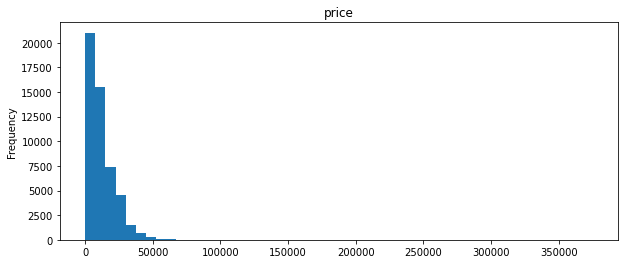

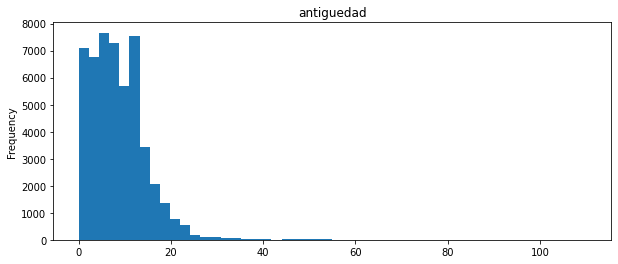

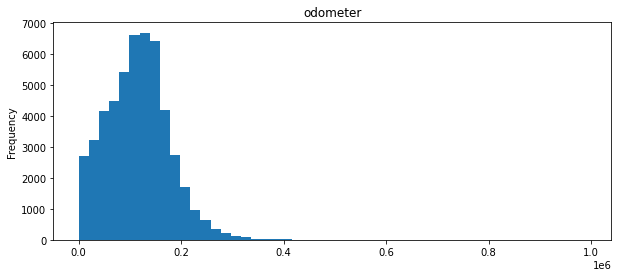

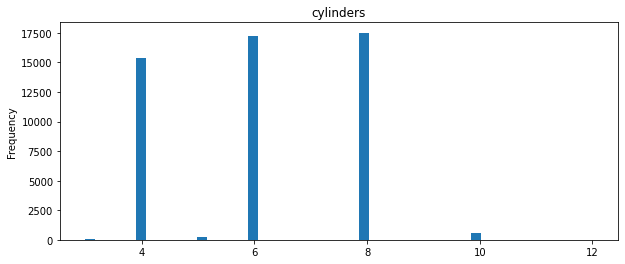

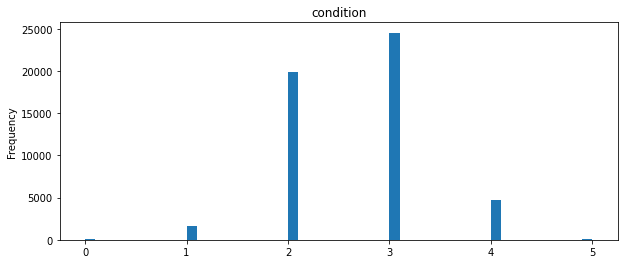

In [79]:
#hacer un bucle para graficar los histogramas
group_colum = ["price", "antiguedad", "odometer", "cylinders", "condition"]

for i in group_colum:
    data_anuncios[i].plot(kind= "hist", bins=50, figsize=(10,4), title=i, range=(data_anuncios[i].min(), data_anuncios[i].max()))
    plt.show()


In [80]:
# generar datos estadísticos
data_anuncios.describe()


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,antiguedad,millaje_por_año
count,50975.000000,50975.000000,50975.000000,50975.000000,50975.000000,50975.000000,50975.000000,50975.000000,50975.000000,50975.000000,50975.000000,50975.000000
mean,12130.817106,2009.788308,2.638117,6.121020,115186.066179,0.496498,39.542246,3.004787,6.629701,2018.307425,8.519117,17746.317934
std,10042.165686,6.115123,0.712584,1.657413,62387.715502,0.499993,28.197777,1.997658,3.474146,0.461432,6.128839,12503.806137
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,73000.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10857.142857
50%,9000.000000,2011.000000,3.000000,6.000000,113920.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15199.500000
75%,16800.000000,2014.000000,3.000000,8.000000,153000.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,21053.159722
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,373200.000000


Como ya fue mencionado anteriormente, de las columnas graficadas, todas a excepción de "cylinders" presentan datos que se salen de la mediana y para ello se corroborá con los boxplot



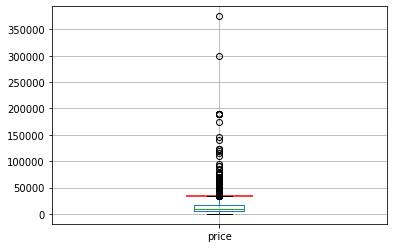

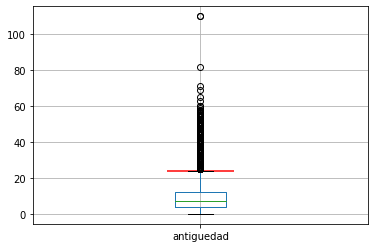

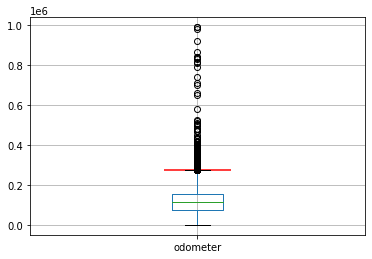

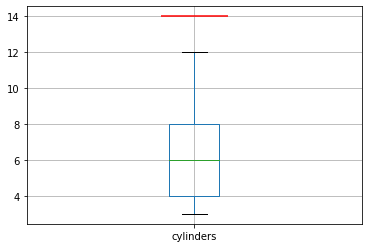

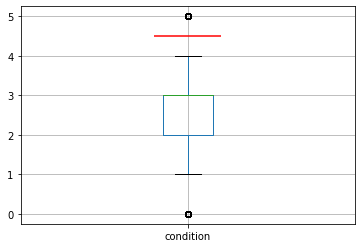

In [81]:
# bucle para generar boxplot

group_colum = ["price", "antiguedad", "odometer", "cylinders", "condition"]

for i in group_colum:
    Q1=data_anuncios[i].quantile(0.25)
    Q3=data_anuncios[i].quantile(0.75)
    IQR=Q3-Q1
    data_anuncios.boxplot(i)
    plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color="red")
    plt.show()

En conclusión, 4 de los 5 parámetros analizados presentan valores atípicos, es decir, están por encima del límite superior


## Estudiar y tratar valores atípicos

A continuación, se procederá a determinar los límites inferiores y superiores para las 5 columnas seleccionadas, de manera tal que pueda definir el rango para excluir los valores atípicos.

In [82]:
# Determina los límites inferiores para valores atípicos

group_colum = ["price", "antiguedad", "odometer", "cylinders", "condition"]

for i in group_colum:
    
    Q1=data_anuncios[i].quantile(0.25)
    Q3=data_anuncios[i].quantile(0.75)
    IQR=Q3-Q1
    Q1lim=Q1-IQR*1.5
    print(f"límite inferior de la columna {i}:", Q1lim)

límite inferior de la columna price: -12700.0
límite inferior de la columna antiguedad: -8.0
límite inferior de la columna odometer: -47000.0
límite inferior de la columna cylinders: -2.0
límite inferior de la columna condition: 0.5


In [83]:
# Determinar los límites superiores para valores atípicos

group_colum = ["price", "antiguedad", "odometer", "cylinders", "condition"]

for i in group_colum:
    
    Q1=data_anuncios[i].quantile(0.25)
    Q3=data_anuncios[i].quantile(0.75)
    IQR=Q3-Q1
    Q3lim=1.5*IQR+Q3
    print(f"límite superior de la columna {i}:", Q3lim)

límite superior de la columna price: 34500.0
límite superior de la columna antiguedad: 24.0
límite superior de la columna odometer: 273000.0
límite superior de la columna cylinders: 14.0
límite superior de la columna condition: 4.5


In [84]:
data_anuncios.query('price ==375000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,antiguedad,millaje_por_año
12504,375000,1999,nissan frontier,2,6,gas,115000.0,automatic,pickup,blue,1,2018-05-19,21,5,5,2018,19,6052.631579


In [85]:
data_anuncios.query('odometer ==990000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,antiguedad,millaje_por_año
17869,59900,1964,chevrolet corvette,4,8,gas,990000.0,automatic,convertible,red,0,2018-06-17,28,6,6,2018,54,18333.333333
40729,4700,2013,chevrolet cruze,2,6,gas,990000.0,automatic,sedan,black,0,2018-05-02,4,2,5,2018,5,198000.000000


In [86]:
data_anuncios.query('price < 100')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,antiguedad,millaje_por_año
405,1,2014,chevrolet camaro,3,6,gas,71310.0,automatic,coupe,sin definir,0,2018-07-14,29,5,7,2018,4,17827.500000
3063,1,1998,chevrolet silverado,2,8,gas,164000.0,automatic,pickup,sin definir,1,2018-10-11,49,3,10,2018,20,8200.000000
3808,1,2007,chevrolet tahoe,2,8,gas,200.0,automatic,SUV,red,0,2019-03-18,63,0,3,2019,12,16.666667
3902,1,1996,ford f-150,1,8,gas,163000.0,manual,truck,white,0,2019-02-23,54,5,2,2019,23,7086.956522
4140,1,2004,chevrolet silverado,3,8,diesel,83000.0,automatic,pickup,sin definir,1,2019-02-04,14,0,2,2019,15,5533.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50245,1,1986,chevrolet silverado,2,8,gas,90420.0,automatic,truck,red,1,2018-11-30,50,4,11,2018,32,2825.625000
50393,1,2003,gmc sierra 2500hd,2,8,diesel,212300.0,automatic,pickup,black,1,2019-04-12,28,4,4,2019,16,13268.750000
50430,5,2011,toyota sienna,2,6,gas,123538.0,automatic,SUV,green,0,2018-12-03,5,0,12,2018,7,17648.285714
50971,10,2012,toyota prius,3,4,hybrid,101000.0,automatic,hatchback,green,0,2019-03-16,29,5,3,2019,7,14428.571429


In [87]:
# Almacena los datos sin valores atípicos en un DataFrame separado

data_anuncios_sin_atipicos = data_anuncios.query('100<price<=34500 and odometer<=273000 and antiguedad<=25 and 1<=condition<=4')
data_anuncios_sin_atipicos.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,antiguedad,millaje_por_año
count,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000
mean,11401.371392,2009.915472,2.628289,6.034470,116217.381873,0.480302,39.539577,3.000765,6.635680,2018.306170,8.390698,17597.279810
std,7730.866622,5.077748,0.685795,1.634006,55574.296146,0.499617,28.215829,1.995088,3.471459,0.460906,5.090325,11629.266941
min,105.000000,1993.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5295.000000,2007.000000,2.000000,4.000000,78514.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,5.000000,10952.380952
50%,9000.000000,2011.000000,3.000000,6.000000,117465.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,15127.666667
75%,15995.000000,2014.000000,3.000000,8.000000,153000.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,20764.454545
max,34500.000000,2019.000000,4.000000,12.000000,273000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,25.000000,195700.000000


## Estudiar parámetros principales sin valores atípicos

<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

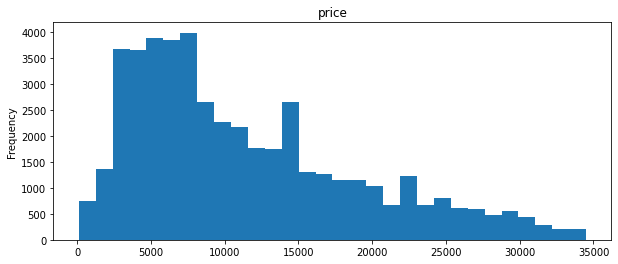

In [88]:
data_anuncios_sin_atipicos["price"].plot(kind= "hist", bins=30, title="price", figsize=(10,4), range=(data_anuncios_sin_atipicos["price"].min(), data_anuncios_sin_atipicos["price"].max()))

In [89]:
def funcion_estadistica(df, df2, columna):
    p1 = df[columna].describe() 
    p2 = df2[columna].describe()
    d = pd.concat([p1, p2], axis=1)
    d.columns = ['original', 'sin atipicos']
    return d

funcion_estadistica(data_anuncios, data_anuncios_sin_atipicos, "price")

,original,sin atipicos
count,50975.000000,47085.000000
mean,12130.817106,11401.371392
std,10042.165686,7730.866622
min,1.000000,105.000000
25%,5000.000000,5295.000000
50%,9000.000000,9000.000000
75%,16800.000000,15995.000000
max,375000.000000,34500.000000


El histograma con datos filtrados muestra que los datos tienen asimétría positiva ya que la media es mayor que la mediana y se concentran del lado izquierdo con cola decreciente hacia la derecha. La mayoría de los datos se ubican alrededor de la mediana con un gran pico alrededor de los 6000. Se reportan precios por debajo de los 1000 (coches muy baratos, pero bueno se puede justificar que pueden ser usados más para refacción que otra cosa, pueden estar muy gastados, altos millajes, carrocería golpeada, etc) y por encima de los 15000 con aproximadamente la misma frecuencia. Ya de 16000 en adelante la frecuencia es baja en comparación con el resto de los datos.
La comparación en los parámetros estadísticos muestra que que la mediana se mantuvo en 9000 y la media disminuyó. Igualmente se observa variación en los cuantiles(25 y 75%). Estos cambios hacen que la media y la mediana se aproximen más y se disminuya la desviación standard.

<AxesSubplot:title={'center':'odometer'}, ylabel='Frequency'>

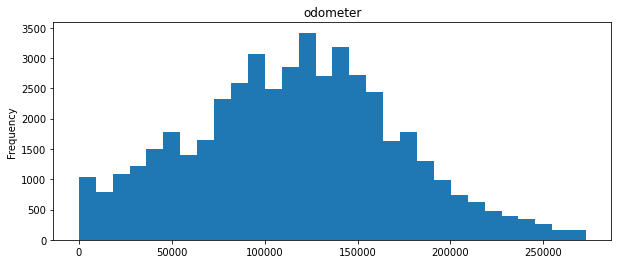

In [90]:
data_anuncios_sin_atipicos["odometer"].plot(kind= "hist", bins=30, figsize=(10,4), title="odometer", range=(data_anuncios_sin_atipicos["odometer"].min(), data_anuncios_sin_atipicos["odometer"].max()))

In [91]:
funcion_estadistica(data_anuncios, data_anuncios_sin_atipicos, "odometer")

,original,sin atipicos
count,50975.000000,47085.000000
mean,115186.066179,116217.381873
std,62387.715502,55574.296146
min,0.000000,0.000000
25%,73000.000000,78514.000000
50%,113920.000000,117465.000000
75%,153000.000000,153000.000000
max,990000.000000,273000.000000


La distribución de odómetro se muestra más simétrica y más próxima a una distribución normal aparentemente y la mediana si sufrió un ligero incremento en la data filtrada en relación con los datos originales, superando a la media. Por encima de los 180000 la frecuencia disminuye considerablemente. Aún se tienen coches con bajo millaje, pero ahora si se aproximan más la mediana y la media.

<AxesSubplot:title={'center':'antiguedad'}, ylabel='Frequency'>

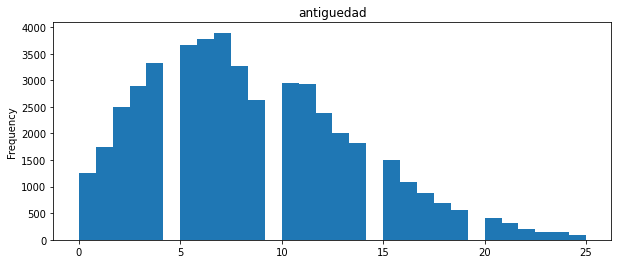

In [92]:
data_anuncios_sin_atipicos["antiguedad"].plot(kind= "hist", figsize=(10,4), bins=30, title="antiguedad", range=(data_anuncios_sin_atipicos["antiguedad"].min(), data_anuncios_sin_atipicos["antiguedad"].max()))

In [93]:
funcion_estadistica(data_anuncios, data_anuncios_sin_atipicos, "antiguedad")

,original,sin atipicos
count,50975.000000,47085.000000
mean,8.519117,8.390698
std,6.128839,5.090325
min,0.000000,0.000000
25%,4.000000,5.000000
50%,7.000000,8.000000
75%,12.000000,12.000000
max,110.000000,25.000000


En cuanto a la antiguedad, se aprecia como excluir valores por encima de 25 años, disminuyó la media e incrementó la mediana. Su distribucón muestra una asimetría positiva por cuanto la media sigue siendo mayor que la mediana y los datos sesgados. Hay valores con menos frecuencias en coches con más de 12 años. La forma de los datos es debido a que hay cierto agrupamiento en el número de años y son valores discretos.

<AxesSubplot:title={'center':'condition'}, ylabel='Frequency'>

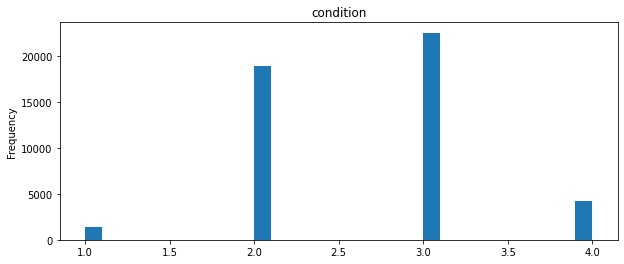

In [94]:
data_anuncios_sin_atipicos["condition"].plot(kind= "hist", figsize=(10,4), bins=30, title="condition", range=(data_anuncios_sin_atipicos["condition"].min(), data_anuncios_sin_atipicos["condition"].max()))

In [95]:
data_anuncios_sin_atipicos["condition"].describe()

count    47085.000000
mean         2.628289
std          0.685795
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: condition, dtype: float64

En la columna "condition" se observa que la mayor cantidad de datos está en torno a la condicion de excelente, seguido por coches en buenas condiciones. La media estadística arroja valores decimales por lo que el mejor patrón para analizar esta columna con datos discretos es la media. No se hace un comparativo con datos sin filtrar porque aún no había cambiado la columna por números.

## Periodo de colocación de los anuncios

Ahora se analizará la columna "days_listed", calculando los estadísticos. 

<AxesSubplot:title={'center':'days_listed'}, ylabel='Frequency'>

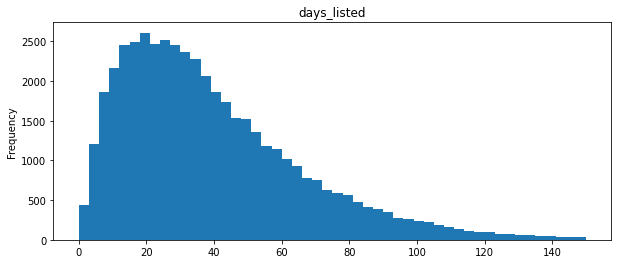

In [96]:
data_anuncios_sin_atipicos["days_listed"].plot(kind= "hist", bins=50, title="days_listed", figsize=(10,4), range=(data_anuncios_sin_atipicos["days_listed"].min(), 150))

In [97]:
funcion_estadistica(data_anuncios, data_anuncios_sin_atipicos, "days_listed")

,original,sin atipicos
count,50975.000000,47085.000000
mean,39.542246,39.539577
std,28.197777,28.215829
min,0.000000,0.000000
25%,19.000000,19.000000
50%,33.000000,33.000000
75%,53.000000,53.000000
max,271.000000,271.000000


Analizando la data contenida en la variable días de publicación, se observa en su histograma, que por lo general los vehículos son publicados con mayor fecuencia en un rango de 20 a 40 días (mediana cercana a la media), ya por encima de los 50 días es mucho tiempo para la publicación y por debajo de los 20 días se considera muy poco el tiempo. También se aprecia que hay datos de 0 días de publicación, puede ser que fueron eliminados porque no cumplieron con algún requisito, o se arrepintieron los vendedores o la venta fue flash y se retiró el anuncio. Definitivamente hay anuncios con muchos días de publicación. 

## Precio promedio por cada tipo de vehículo

A continuación se analiza el número de anuncios y el precio promedio para cada tipo de vehículo. 

<AxesSubplot:xlabel='type'>

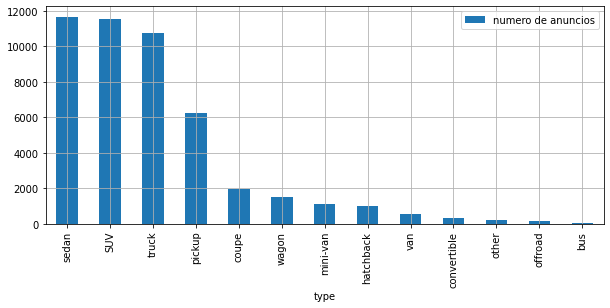

In [98]:
data_anuncios_by_type = data_anuncios_sin_atipicos.pivot_table(index="type", values="price", aggfunc=["mean", "count"])
data_anuncios_by_type.columns = ["price", "numero de anuncios"]
data_anuncios_by_type.sort_values(by="numero de anuncios", ascending=False).plot(kind="bar", y="numero de anuncios", grid=True, figsize=(10,4))

<AxesSubplot:xlabel='type'>

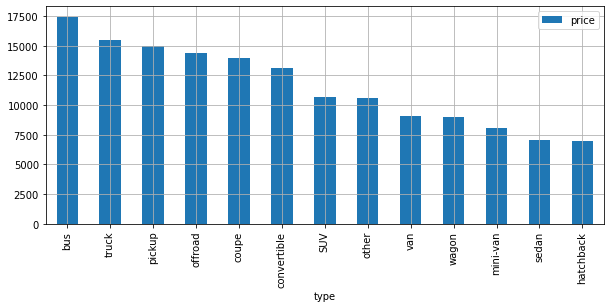

In [99]:
data_anuncios_by_type.sort_values(by="price", ascending=False).plot(kind="bar", y="price", grid=True, figsize=(10,4))

Los vehículos que más se anuncian para la venta son los sedan y los SUV, seguidos muy de cerca por los truck, ya en menor proporción las pickup. Notamos que pocos autobuses se publican y ya desde las van casi no hay publicaciones.
Comparando en función del precio, se observa que el vehículo más costoso corresponde a el tipo de bus, seguido por truck, pickup, offroad, coupe, convertible.......estando en la penúltima posición de precios, el sedan, que es el vehículo que  más anuncios tiene, popular y a bajo precio y el bus es el menos publicitado y más costoso.

## Factores de precio

¿Qué factores impactan más sobre el precio? Ahora se estudia si el precio depende de los años, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color) se trazará gráficos de caja y bigotes y gráficos de dispersión para el resto. 

In [100]:
#generar tabla con antiguedad y precio según tipo de vehiculo
data_anuncios_by_type_col_ant = data_anuncios_sin_atipicos.query('type ==("SUV", "sedan")').pivot_table(index="type", columns="antiguedad", values="price", aggfunc="mean")


<AxesSubplot:xlabel='antiguedad', ylabel='price'>

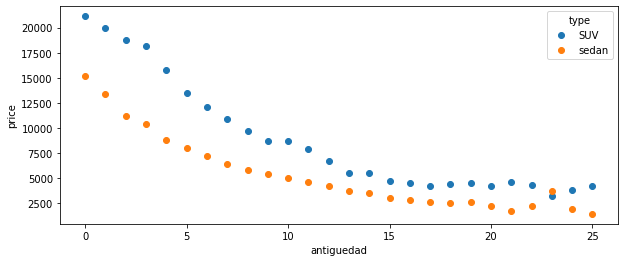

In [101]:
#gráfica para antiguedad y precio promedio
data_anuncios_by_type_col_ant.T.plot(style="o", figsize=(10,4), ylabel="price")

<AxesSubplot:xlabel='odometer', ylabel='price'>

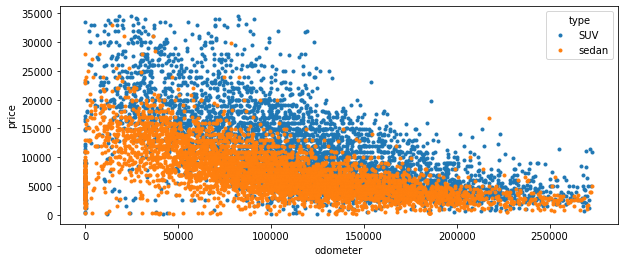

In [102]:
data_anuncios_by_type_col = data_anuncios_sin_atipicos.query('type ==("SUV", "sedan")').pivot_table(index="type", columns="odometer", values="price", aggfunc="mean")
data_anuncios_by_type_col.T.plot(style="o", figsize=(10,4), ms=3, ylabel="price")


<AxesSubplot:xlabel='millaje_por_año', ylabel='price'>

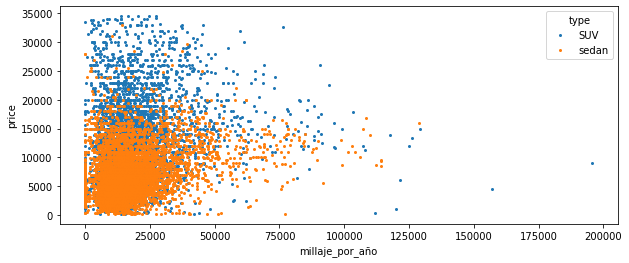

In [103]:
data_anuncios_by_type_col = data_anuncios_sin_atipicos.query('type ==("SUV", "sedan")').pivot_table(index="type", columns="millaje_por_año", values="price", aggfunc="mean")
data_anuncios_by_type_col.T.plot(style="o", figsize=(10,4), ms=2, ylabel="price")


<AxesSubplot:xlabel='condition', ylabel='price'>

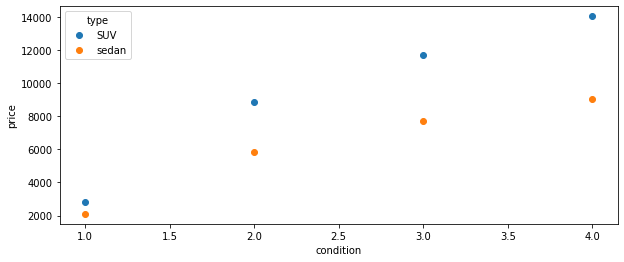

In [104]:
data_anuncios_by_type_col = data_anuncios_sin_atipicos.query('type ==("SUV", "sedan")').pivot_table(index="type", columns="condition", values="price", aggfunc="mean")
data_anuncios_by_type_col.T.plot(style="o", figsize=(10,4), ylabel="price")

Analizando la data, se observa que el precio definitivamente es influenciado de la siguiente manera:
- A medida que el auto incrementa sus años, es decir, es más antiguo su precio disminuye, por supuesto, mientrás más nuevo es, más costoso ya que no requiere de tanto mantenimiento, no debe presentar fallas, de lujooooo, quien no quiere un coche nuevo.
- A medida que aumenta el millaje, pierde valor el coche, es decir, se hace más barato. Por eso que esta variable es tan importante al momento de comprar un coche, porque de alguna manera, un millaje bajo garantiza coche nuevo, claro está que puede estar muy nuevo pero víctima de choques, bandalismo, etc., sin embargo, definitivamente deseariamos comprar un coche "0" millas, casi de agencia.
- La gráfica de millaje por año muestra que la mayor cantidad de datos se concentran entre 0 y 25000, aquí están tan juntos los datos que es casi imposible establecer un patrón, se ve más claro con la variable odómetro.
- En términos de la condición: a medida que nos aproximamos a 4 el coche es como nuevo y eso incrementa su valor.
Estos comportamientos se observaron en ambos modelos de coche (los más populares) sin embargo, de ellos la SUV en todos los análisis muestra mayor precio que el sedán (se corroborá en la gráfica de barras, precios vs tipo de vehículo).

In [105]:
#calcular el número de anuncios para SUV según transmisión
x=data_anuncios_sin_atipicos[data_anuncios_sin_atipicos["type"]=="SUV"]
print(x["transmission"].value_counts())


automatic    10970
manual         466
other           93
Name: transmission, dtype: int64


In [106]:
#calcular el número de anuncios para sedan según transmisión
y=data_anuncios_sin_atipicos[data_anuncios_sin_atipicos["type"]=="sedan"]
print(y["transmission"].value_counts())

automatic    11029
manual         562
other           73
Name: transmission, dtype: int64


Los número de anuncios tanto para SUV como para sedán se ubican por encima de los 50, por lo tanto se incluirán en el análisis.

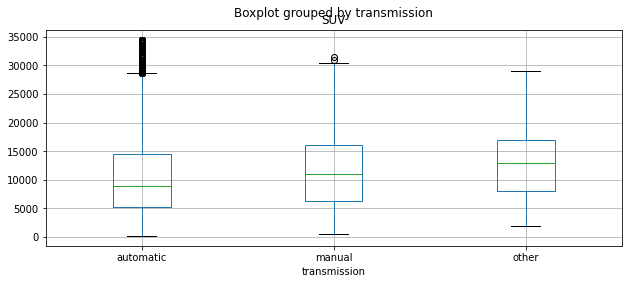

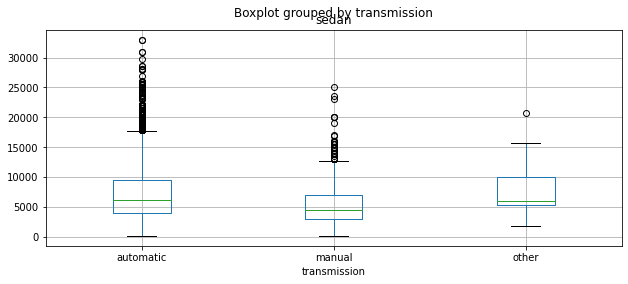

In [107]:
#Calculo de boxplot para las variables categóricas

for tipo, datos in data_anuncios_sin_atipicos.query('type ==("SUV", "sedan")').groupby("type"):
    datos.boxplot(by="transmission", column="price", figsize=(10,4))
    plt.title(tipo)
    plt.show()


Los gráficos de boxplot muestran datos atípicos en la columna de transmisión, con mayores valores en el tipo sedán. El precio más alto se consigue en el modelo automático para el sedan (aprox 16000) mientrás que en la SUV la transmisión manual se vende muy ligeramente por encima que la automática, están casi casi en el mismo valor, con la salvedad que en la automática hay mayor cantidad de datos atípicos. En el caso de otro tipo de transmisión, el precio promedio del coche se aproxima a los otros dos tipos de transmisión en el sedán mientras que en la SUV en términos del 50% es mayor.

In [108]:
#calcular el número de anuncios para SUV según color
xc=data_anuncios_sin_atipicos[data_anuncios_sin_atipicos["type"]=="SUV"]
print(xc["paint_color"].value_counts())

sin definir    2065
black          2016
white          1823
silver         1472
grey           1121
blue            980
red             855
green           416
brown           349
custom          269
orange           80
yellow           45
purple           38
Name: paint_color, dtype: int64


In [109]:
#calcular el número de anuncios para sedan según color
yc=data_anuncios_sin_atipicos[data_anuncios_sin_atipicos["type"]=="sedan"]
print(yc["paint_color"].value_counts())

sin definir    2094
silver         1999
black          1715
grey           1579
white          1436
blue           1180
red             897
custom          259
brown           251
green           201
purple           23
yellow           21
orange            9
Name: paint_color, dtype: int64


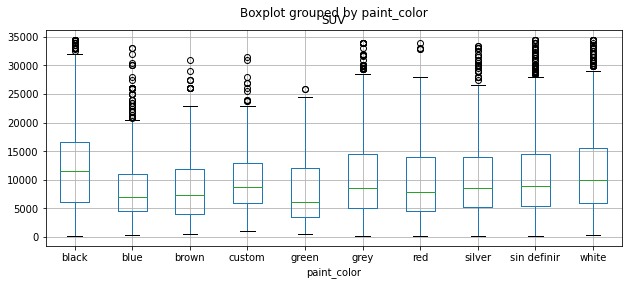

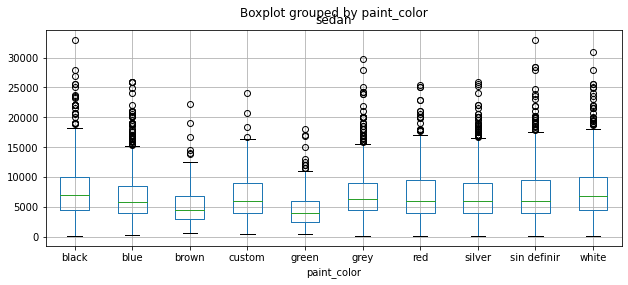

In [110]:
#gráficos boxplot para la columna color 
for tipo, datos in data_anuncios_sin_atipicos.query('type ==("SUV", "sedan") and paint_color !=["orange", "purple", "yellow"]').groupby("type"):
    datos.boxplot(by="paint_color", column="price", figsize=(10,4))
    plt.title(tipo)
    plt.show()

La variable color, muestra resultados interesantes:
1. SUV:
- El precio más alto (por encima de 30000) se consigue en vehículos negros seguido de blanco, gris, plata, interesantes colores.
- La mediana oscila alrededor de los 7000 en casi todos los colores, a excepción del negro, que está por encima de los 10000 y el balnco en 10000.
- La mayoría de los colores presentan datos atípicos.
Sedan: 
- Los coches negros  y blanco se venden a precios más altos(18000 aprox).
- La mediana de los precios se ubica aprox en los 5500 - 6000 en la mayoría de los colores, con excepción del verde y café que están por debajo de los 5000. 
- La mayoría de los colores tienen datos atípicos.
- Los coches de color negro y blanco se venden al mismo precio.

In [111]:
#tabla de correlación
data_anuncios_sin_atipicos_type = data_anuncios_sin_atipicos.query('type ==("SUV", "sedan")')
data_anuncios_sin_atipicos_type.corr()['price']

price              1.000000
model_year         0.572819
condition          0.267405
cylinders          0.162450
odometer          -0.526806
is_4wd             0.286822
days_listed       -0.008332
weekday            0.003681
month             -0.012623
year               0.009797
antiguedad        -0.570062
millaje_por_año    0.248642
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='antiguedad', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='millaje_por_año', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='antiguedad', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>,
        <AxesSubplot:xlabel='millaje_por_año', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='antiguedad'>,
        <AxesSubplot:xlabel='odometer', ylabel='antiguedad'>,
        <AxesSubplot:xlabel='antiguedad', ylabel='antiguedad'>,
        <AxesSubplot:xlabel='condition', ylabel='antiguedad'>,
        <AxesSubplot:xlabel='millaje_por_año', ylabel='antiguedad'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xl

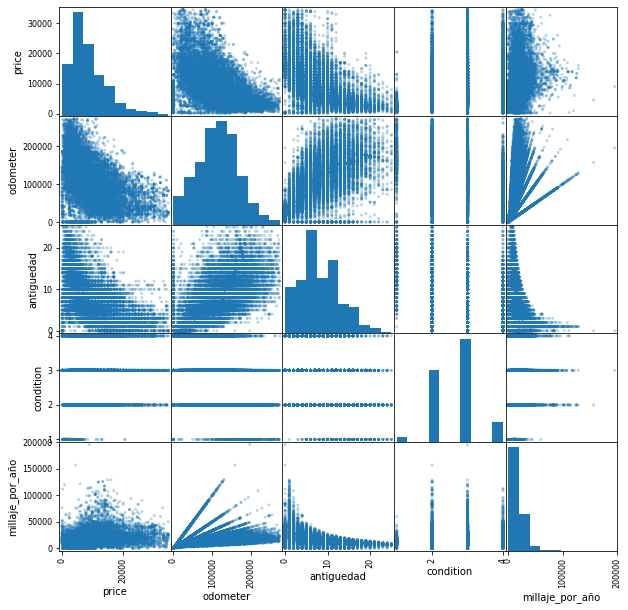

In [112]:
# matriz de dispersión
columns=["price", "odometer", "antiguedad", "condition", "millaje_por_año"]
pd.plotting.scatter_matrix(data_anuncios_sin_atipicos_type[columns], figsize=(10,10), alpha=0.3)

Las graficas de dispersión y la matriz de correlación muestra que el precio está muy relacionado con el millaje (-0.52), y la antiguedad (-0.55), ya en menor proporción se aprecia una relación con el cilindraje(0.17), la tracción 4x4 (0.3), millaje por año(0.25) y la condición(0.22). 
La relación con las 2 primeras variables (millaje y antiguedad) es inversa, es decir, el precio aumenta cuando el millaje y la antiguedad disminuyen y con el resto es directa (incrementa el precio cuando es de más cilindraje, es tracción 4x4 y condición de nueva). Con millaje promedio por año la relación es directa, sin embargo, al observar la dispersión se aprecia que están muy concentrados y solo en precios entre 10000 y 20000 de precio se alcanza a ver datos fuera de rango, no está muy clara la relación con esta variable. 

## Conclusión general



Finalmente podemos decir que la información proporcionada contenía un total de 51525 datos con 13 columnas originales, de las cuales, 
1. La columna "is_4wd" es la que mayor cantidad de datos ausentes tenía (50%). Del análisis se detectó que la misma tenía datos booleanos, es decir, 1 para "True" y 0 para False, por lo que fuera probable que los usuarios no rellenaron este renglón porque su vehículo no tiene tracción 4 ruedas, de allí que la imputación se hizo reemplazando los NaN  por 0.
2. La columna con "paint_color" fue la segunda en cantidad de datos ausentes (18%), por ser una variable categórica se determinó realizar la imputación de los ausentes por "sin definir". Se asumió que esta ausencia de datos podría deberse a que el vehículo tiene más de un color, está degradado por el sol o la lluvia, o no es el color original o simplemente el anunciador no lo coloca para que el interesado en comprar, no lo descarte porque no es el color que busca, muchas veces del ver el coche nace el amor sin detenerse a pensar en el color.
3. La columna "odometer" tenía 7892 valores ausentes (15%) y este dato si es importante al momento de una venta, no creo que tantos vehículos tengan dañado el sensor o solo lo dejan de publicar para que el cliente no lo descarte a priori por tanta rosca, osea tanto uso. Se determinó la mediana por año del modelo y de realizó la sustitución de los mismos.
4. Los valores ausentes (10%) en cilindraje pueden deberse a desconocimiento del anunciante o simplemente no cree importante colocar el dato, su imputación se realizó al realacionarla con el modelo y reemplazar con la moda, ya que la media resulta en un número fraccional y esta variable representa valores discretos enteros.
5. La columna "model_year" es la variable con menos datos ausentes(7%), por lo que se pensó que no les interesa publicar que tan viejo pueda ser el coche. Hoy en día, las personas prefieren comprar vehículos de modelos recientes, al menos, claro está, que sea un coleccionista de coches de vieja data. La imputación de estos valores ausentes se hizo con la mediana, dado que al igual que en el caso anterior la media está dada por un valor decimal y en la realidad hablamos de una variable discreta entera.
6. Se eliminaron 549 registros de vehículos que no tenían simultáneamente los datos de odómetro y año del modelo.
7. Se eliminó el registro de un vehículo que no tenía información de odómetro ni de su mediana.
8. Se encontró que no había valores duplicados en el dataframe.
9. Se transformaron los tipos de datos de:
  - La columna "model_year" aparece como float64 y debe ser entero.
  - La columna "cylinders" aparece como float64 y debe ser entero.
  - La columna "odometer" aparece como object y debe ser float64.
  - La columna "is_4wd" aparece como float y debe ser la subclase de entero (0 y 1)
  - La columna "date_posted" aparece como object y debe ser datetime.
  - La columna "condition" aparece como object y se transformó a entero usando una escala del 0-5, siendo 5 lo más nuevo.
10. Se determinaron nuevas columnas: 
  - año en que se publicó (se tomo con "dt" solo el año de la publicación)
  - antiguedad (cuantos años tiene el vehículo a la fecha de la publicación)
  - millaje por año (millas por año).
11. Se construyeron histogramas y gráficos de caja y bigotes para determinar la presencia de datos atípicos en las variables: precio, odómetro, antiguedad, cilindraje y condición, encontrándose valores atípicos en odómetro (máximo de 990000 y mínimo de 0), precio (máximo de 375000 y mínimo de 0) y antiguedad de 111 años.
12. Se filtraron los datos por el límite superior y por algunos límites inferiores:
  - límite superior de la columna price: 34500.0 y precios mayor a 100
  - límite superior de la columna antiguedad: 25.0
  - límite superior de la columna odometer: 273000.0
  - límite superior de la columna cylinders: 14.0
  - límite superior de la columna condition: 4.5 se consideró 4.
13. Se determinaron los modelos de vehículos con más anuncios en la web, detectándose que era la SUV y el sedán, estando el bus en última posición por ser el que menos anuncios tiene. En cuanto a precio se invirtieron las posiciones y el bus se colocó en primer lugar con precio mayor y el sedán en el último.
14. Finalmente se realizaron gráficos de dispersión para las variables cuantitativas (precio, odómetro, antiguedad, cilindraje) y gráficos de caja y bigotes para las categóricas (color y transmisión), encontrándose tanto para la SUV como para el sedán que:
  - A mayor millaje y mayor antiguedad del vehículo, el precio disminuye, consistente con la realidad, puesto que mientrás más rueda (millaje) y avanza en edad se deprecia más rápido y su valor de mercado disminuye.
  - Con la variable millaje_por_año, la relación es débil y directa, sin embargo, en el gráfico de dispersión no se alcanza a observar una relación. Los datos se concentran (una nube) entre 0 y 25000 millas por año haciendo confusa su interpretación.
  - A mayor cilindraje el precio aumenta y también el consumo de combustible......
  - Por la condición, mientrás más excelente o nuevo este el modelo más costoso será, es decir, en mejores condiciones más dinero se puede obtener por la venta.
  - La SUV tienen precios mayores que el sedán, es decir, son más costosos.
  - Los colores asociados a precio más alto para la SUV es el negro y el blanco.
  - Los coches SUV negros, blancos, gris, amarillo y naranja se venden en promedio más costoso.
  - La mediana de los precios en el sedan, se ubica aprox en los 5500 - 6000 en la mayoría de los colores, con excepción del verde y café que están por debajo de los 5000. 
  - En los SUV y sedán los coches con precios en promedio más alto está en aquellos con transmisión del tipo "otro". También en esta variable se encontraron datos atípicos.
  - Hay valores atípicos en la variable color.